In [ ]:
import pandas as pd

# Dosyaları yükleme
h1_missing = pd.read_csv("/content/h1_missing.csv")
h2_duplicate = pd.read_csv("/content/h2_duplicate.csv")
h2_missing = pd.read_csv("/content/h2_missing.csv")
page_titles_below_30 = pd.read_csv("/content/page_titles_below_30_characters.csv")
page_titles_duplicate = pd.read_csv("/content/page_titles_duplicate.csv")
response_codes_4xx = pd.read_csv("/content/response_codes_client_error_(4xx).csv")

In [ ]:
# Her metrikteki hata sayısını hesaplama
h1_missing_count = h1_missing.shape[0]
h2_duplicate_count = h2_duplicate.shape[0]
h2_missing_count = h2_missing.shape[0]
meta_short_count = page_titles_below_30.shape[0]
meta_duplicate_count = page_titles_duplicate.shape[0]
broken_links_count = response_codes_4xx.shape[0]


In [ ]:
# Hata metriklerini bir araya getirme
metrics = {
    "Bozuk Linkler": broken_links_count,
    "Eksik H1 Etiketleri": h1_missing_count,
    "Eksik H2 Etiketleri": h2_missing_count,
    "Yinelenen H2 Etiketleri": h2_duplicate_count,
    "Kısa Meta Başlıkları": meta_short_count,
    "Yinelenen Meta Başlıkları": meta_duplicate_count
}

In [ ]:
# Puan hesaplama için ağırlıklar
weights = {
    "Bozuk Linkler": 25,
    "Eksik H1 Etiketleri": 12,
    "Eksik H2 Etiketleri": 8,
    "Yinelenen H2 Etiketleri": 5,
    "Kısa Meta Başlıkları": 10,
    "Yinelenen Meta Başlıkları": 10
}

In [ ]:
# Maksimum hata kabulü (puan düşüşü için belirlenen üst sınır)
max_errors = {
    "Bozuk Linkler": 10,
    "Eksik H1 Etiketleri": 15,
    "Eksik H2 Etiketleri": 15,
    "Yinelenen H2 Etiketleri": 10,
    "Kısa Meta Başlıkları": 15,
    "Yinelenen Meta Başlıkları": 15
}

In [ ]:
# Sağlık skorunu hesaplama
total_score = 100
for metric, count in metrics.items():
    weight = weights[metric]
    max_error = max_errors[metric]
    penalty = min(count / max_error, 1) * weight
    total_score -= penalty

In [ ]:
# Sonuçları hazırlama
results = pd.DataFrame({
    "Metrik": list(metrics.keys()),
    "Hata Sayısı": list(metrics.values()),
    "Ağırlık": [weights[m] for m in metrics.keys()],
    "Maksimum Hata (Ceza Üst Sınırı)": [max_errors[m] for m in metrics.keys()]
})

total_score = max(total_score, 0)  # Skorun negatif olmaması için kontrol
total_score, results

(61.89999999999999,
                       Metrik  Hata Sayısı  Ağırlık  \
 0              Bozuk Linkler            3       25   
 1        Eksik H1 Etiketleri            4       12   
 2        Eksik H2 Etiketleri           12        8   
 3    Yinelenen H2 Etiketleri            2        5   
 4       Kısa Meta Başlıkları           15       10   
 5  Yinelenen Meta Başlıkları           15       10   
 
    Maksimum Hata (Ceza Üst Sınırı)  
 0                               10  
 1                               15  
 2                               15  
 3                               10  
 4                               15  
 5                               15  )

<ipython-input-10-0812aefcbc6b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results['Metrik'], y=results['Hata Sayısı'], palette='coolwarm')


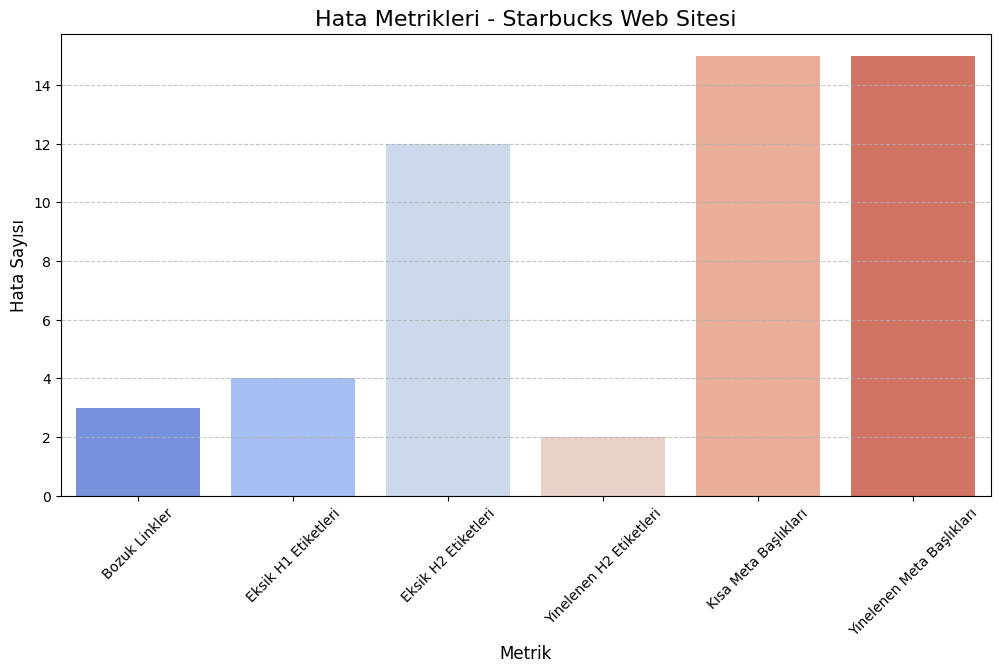

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Görsel ayarları
plt.figure(figsize=(12, 6))
sns.barplot(x=results['Metrik'], y=results['Hata Sayısı'], palette='coolwarm')
plt.title('Hata Metrikleri - Starbucks Web Sitesi', fontsize=16)
plt.ylabel('Hata Sayısı', fontsize=12)
plt.xlabel('Metrik', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

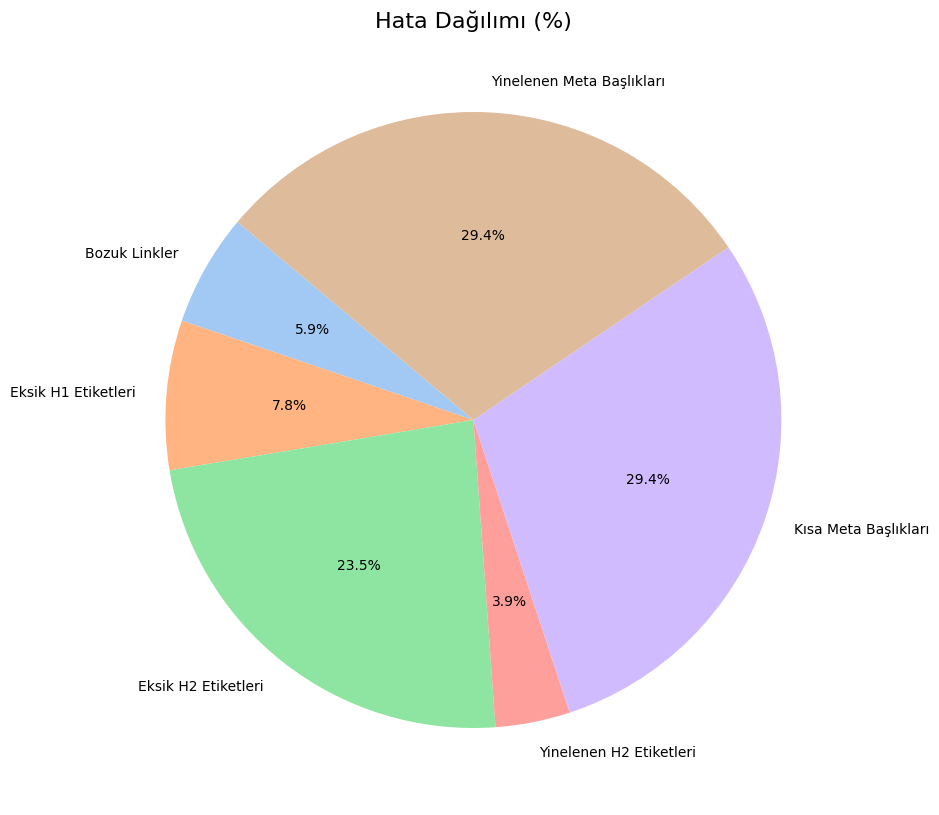

In [ ]:
# Pasta grafiği
plt.figure(figsize=(10, 10))
plt.pie(results['Hata Sayısı'], labels=results['Metrik'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Hata Dağılımı (%)', fontsize=16)
plt.show()


In [ ]:
import plotly.graph_objects as go

# Sağlık Skoru Gösterge Grafiği
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=total_score,
    title={'text': "Sağlık Skoru"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "green" if total_score > 70 else "orange" if total_score > 50 else "red"},
        'steps': [
            {'range': [0, 50], 'color': 'red'},
            {'range': [50, 70], 'color': 'orange'},
            {'range': [70, 100], 'color': 'green'}
        ],
    }
))

fig.show()